<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regressão Linear</h1>

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
import pickle

## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/greenwing1985/housepricing

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Nosso objetivo neste exercício é criar um modelo de machine learning, utilizando a técnica de Regressão Linear, que faça previsões sobre os preços de imóveis a partir de um conjunto de características conhecidas dos imóveis.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Vamos utilizar um dataset disponível no Kaggle que foi gerado por computador para treinamento de machine learning para iniciantes. Este dataset foi modificado para facilitar o nosso objetivo, que é fixar o conhecimento adquirido no treinamento de Regressão Linear.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Siga os passos propostos nos comentários acima de cada célular e bons estudos.</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>precos</b> - Preços do imóveis</li>
    <li><b>area</b> - Área do imóvel</li>
    <li><b>garagem</b> - Número de vagas de garagem</li>
    <li><b>banheiros</b> - Número de banheiros</li>
    <li><b>lareira</b> - Número de lareiras</li>
    <li><b>marmore</b> - Se o imóvel possui acabamento em mármore branco (1) ou não (0)</li>
    <li><b>andares</b> - Se o imóvel possui mais de um andar (1) ou não (0)</li>
</ul>

## Leitura dos dados

Dataset está na pasta "Dados" com o nome "HousePrices_HalfMil.csv" em usa como separador ";".

In [ ]:
dados = pd.read_csv("./HousePrices_HalfMil.csv", sep = ";", header = 0)


## Visualizar os dados

In [ ]:
dados

,precos,area,garagem,banheiros,lareira,marmore,andares
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1
...,...,...,...,...,...,...,...
995,29150,48,1,5,4,0,0
996,43550,112,2,2,3,0,1
997,56575,185,3,4,4,0,1
998,56075,185,2,3,1,0,1


## Verificando o tamanho do dataset

In [ ]:
dados.shape[0]

1000

In [ ]:
dados['garagem'].min()

1

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   precos     1000 non-null   int64
 1   area       1000 non-null   int64
 2   garagem    1000 non-null   int64
 3   banheiros  1000 non-null   int64
 4   lareira    1000 non-null   int64
 5   marmore    1000 non-null   int64
 6   andares    1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


In [ ]:
dados.describe().round(2)

,precos,area,garagem,banheiros,lareira,marmore,andares
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,41985.60,124.33,2.01,3.00,2.03,0.33,0.48
std,12140.39,72.39,0.81,1.43,1.42,0.47,0.50
min,13150.00,1.00,1.00,1.00,0.00,0.00,0.00
25%,33112.50,60.75,1.00,2.00,1.00,0.00,0.00
50%,41725.00,123.00,2.00,3.00,2.00,0.00,0.00
75%,51175.00,187.00,3.00,4.00,3.00,1.00,1.00
max,73675.00,249.00,3.00,5.00,4.00,1.00,1.00


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

### Observe as correlações entre as variáveis:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Quais são mais correlacionadas com a variável dependete (Preço)?</li>
    <li>Qual o relacionamento entre elas (positivo ou negativo)?</li>
    <li>Existe correlação forte entre as variáveis explicativas?</li>
</ul>

In [ ]:
dados.corr()

,precos,area,garagem,banheiros,lareira,marmore,andares
precos,1.000000,0.117689,0.102752,0.124390,0.107209,0.430767,0.631529
area,0.117689,1.000000,-0.007530,-0.011374,0.012114,-0.015270,-0.018006
garagem,0.102752,-0.007530,1.000000,0.067142,0.060455,-0.015629,-0.020588
banheiros,0.124390,-0.011374,0.067142,1.000000,0.048363,-0.025281,-0.018203
lareira,0.107209,0.012114,0.060455,0.048363,1.000000,0.029591,-0.003513
marmore,0.430767,-0.015270,-0.015629,-0.025281,0.029591,1.000000,-0.006527
andares,0.631529,-0.018006,-0.020588,-0.018203,-0.003513,-0.006527,1.000000


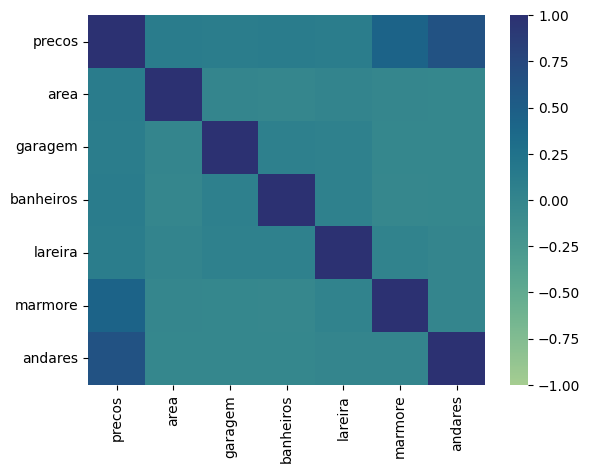

In [ ]:
ax = sns.heatmap(data = dados.corr(), vmin = -1, vmax = 1, cmap = 'crest')

# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

<img width='700px' src='../Dados/img/Box-Plot.png'>

## Importando biblioteca seaborn

<Axes: xlabel='precos', ylabel='Count'>

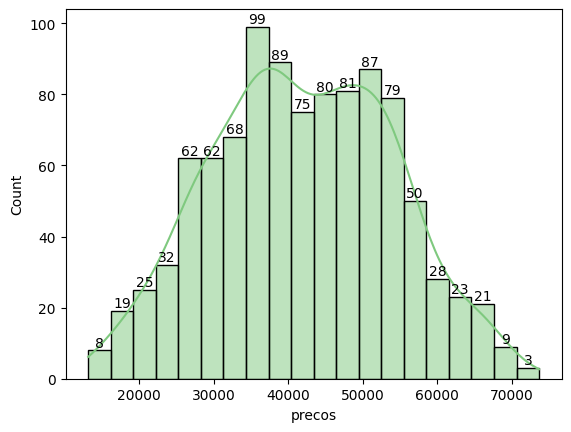

In [ ]:
ax = sns.histplot(data = dados['precos'], bins = 20, kde = True)

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2., height + 1, '{:.0f}'.format((height)), ha='center')

ax

## Configure o estilo e cor dos gráficos (opcional)

In [ ]:
sns.set_palette('Accent')

[]

## Box plot da variável *dependente* (y)


### Avalie o comportamento da distribuição da variável dependente:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Parecem existir valores discrepantes (outliers)?</li>
    <li>O box plot apresenta alguma tendência?</li>
</ul>

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

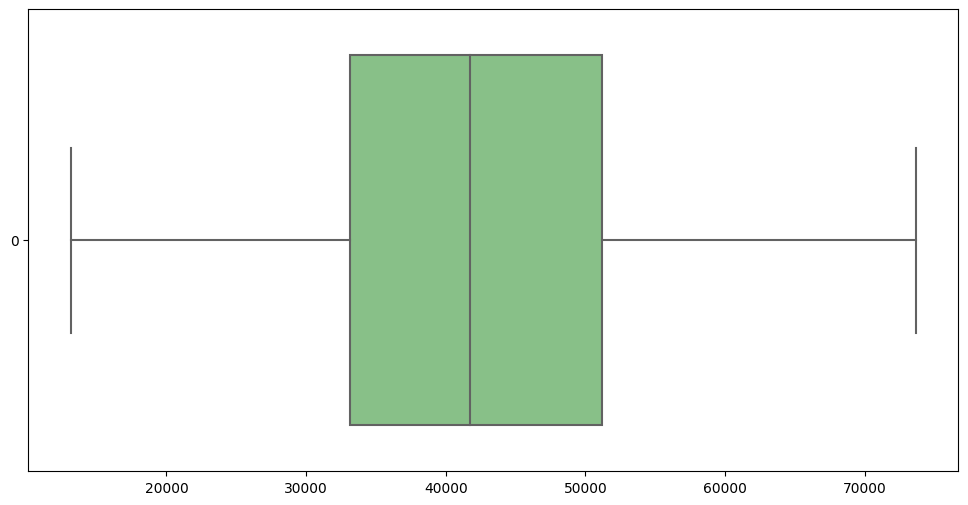

In [ ]:
ax = sns.boxplot(data = dados['precos'], orient='h', )
ax.figure.set_size_inches(12, 6)

## Investigando a variável *dependente* (y) juntamente com outras característica

Faça um box plot da variável dependente em conjunto com cada variável explicativa (somente as categóricas).

### Avalie o comportamento da distribuição da variável dependente com cada variável explicativa categórica:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>As estatísticas apresentam mudança significativa entre as categorias?</li>
    <li>O box plot apresenta alguma tendência bem definida?</li>
</ul>

### Box-plot (Preço X Garagem)

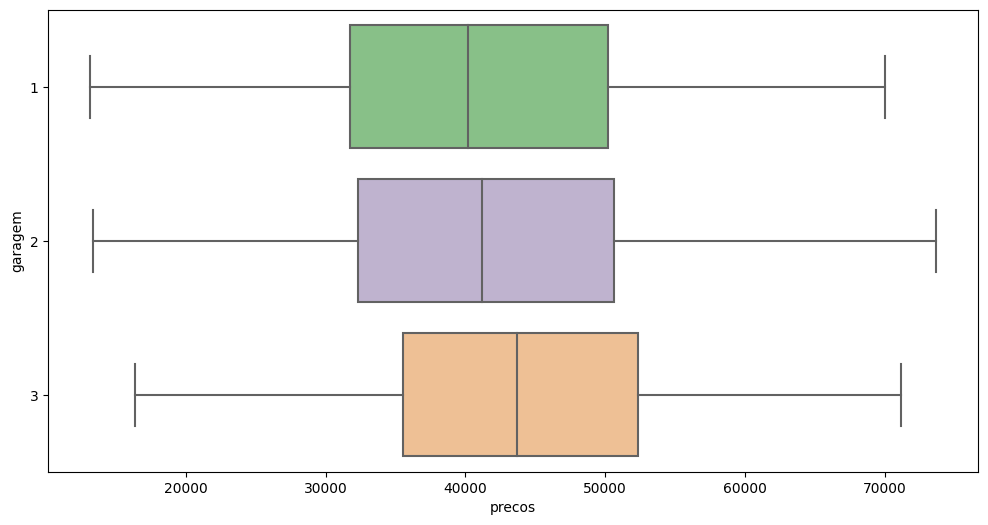

In [ ]:
ax = sns.boxplot(data = dados, y = 'garagem', x = 'precos', orient = 'h')
ax.figure.set_size_inches(12, 6)

### Box-plot (Preço X Banheiros)

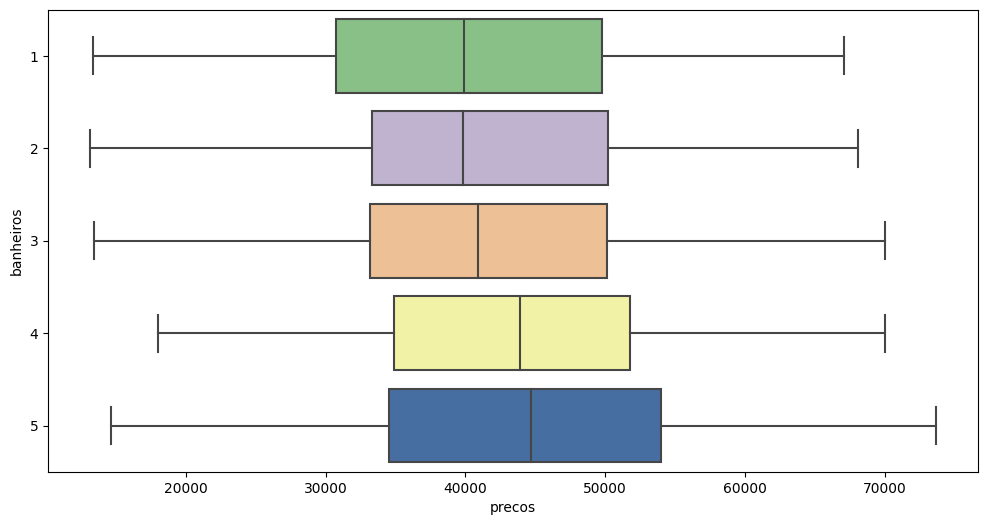

In [ ]:
ax = sns.boxplot(data = dados, y = 'banheiros', x = 'precos', orient = 'h')
ax.figure.set_size_inches(12, 6)

### Box-plot (Preço X Lareira)

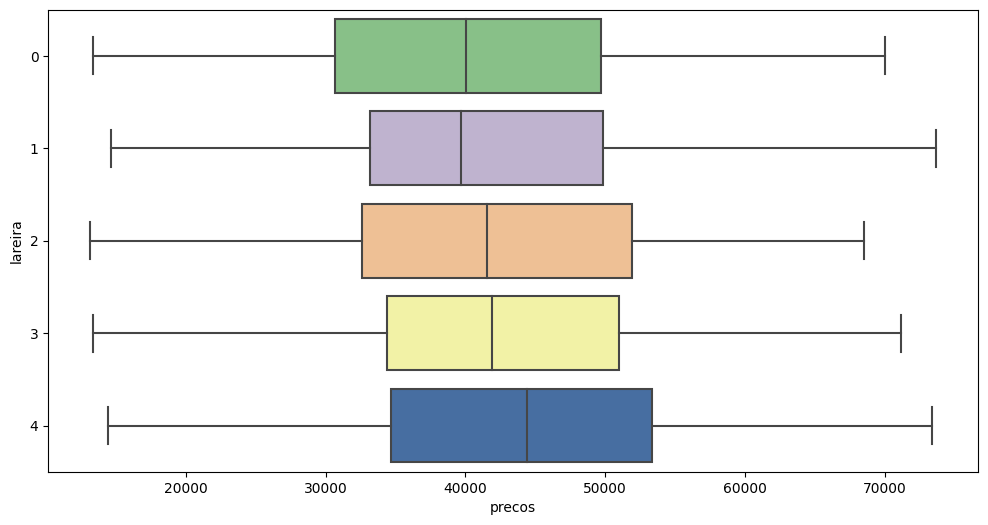

In [ ]:
ax = sns.boxplot(data = dados, y = 'lareira', x = 'precos', orient = 'h')
ax.figure.set_size_inches(12, 6)

### Box-plot (Preço X Acabamento em Mármore)

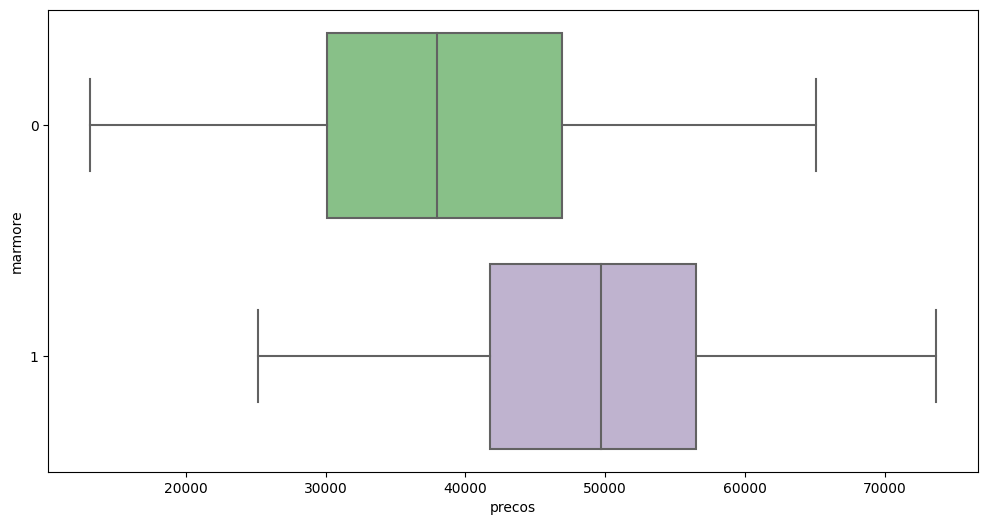

In [ ]:
ax = sns.boxplot(data = dados, y = 'marmore', x = 'precos', orient = 'h')
ax.figure.set_size_inches(12, 6)

### Box-plot (Preço X Andares)

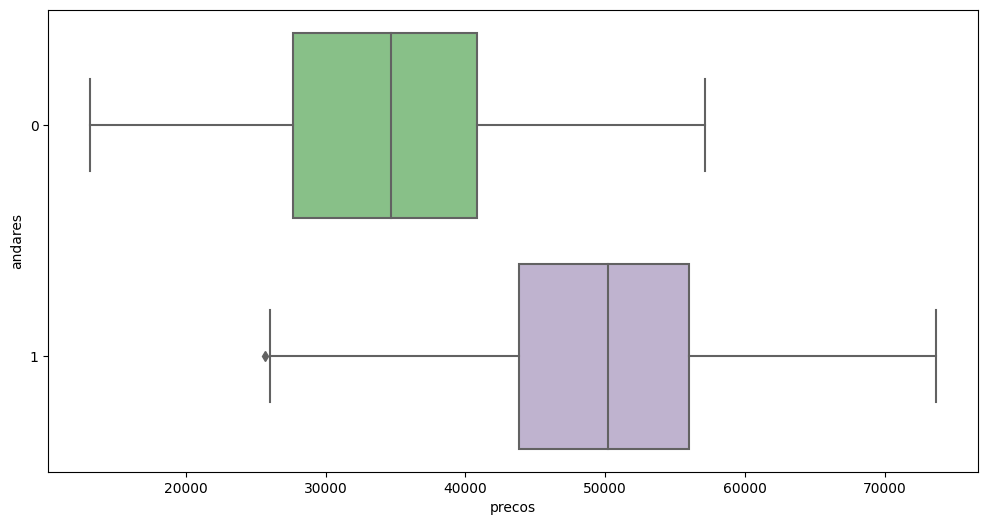

In [ ]:
ax = sns.boxplot(data = dados, y = 'andares', x = 'precos', orient = 'h')
ax.figure.set_size_inches(12, 6)

## Distribuição de frequências da variável *dependente* (y)

Construa um histograma da variável dependente (Preço).

### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>A distribuição de frequências da variável dependente parece ser assimétrica?</li>
    <li>É possível supor que a variável dependente segue uma distribuição normal?</li>
</ul>

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

<Axes: xlabel='precos', ylabel='Count'>

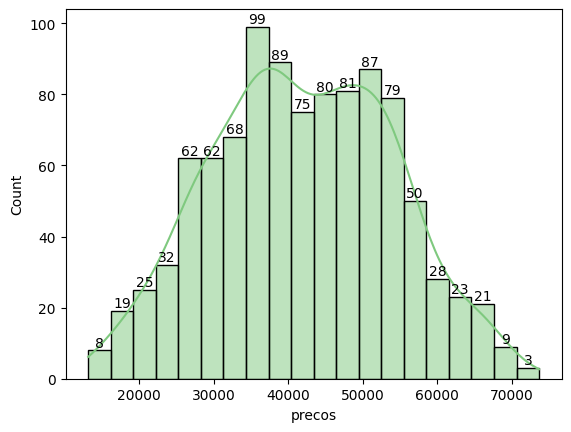

In [ ]:
ax = sns.histplot(data = dados['precos'], bins = 20, kde = True)

for p in ax.patches:
  height = p.get_height()
  ax.text(p.get_x()+p.get_width()/2., height + 1, '{:.0f}'.format((height)), ha='center')

ax

## Gráficos de dispersão entre as variáveis do dataset

## Plotando o pairplot fixando somente uma variável no eixo y

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

Plote gráficos de dispersão da variável dependente contra cada variável explicativa. Utilize o pairplot da biblioteca seaborn para isso.

Plote o mesmo gráfico utilizando o parâmetro kind='reg'.

### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>É possível identificar alguma relação linear entre as variáveis?</li>
    <li>A relação é positiva ou negativa?</li>
    <li>Compare com os resultados obtidos na matriz de correlação.</li>
</ul>

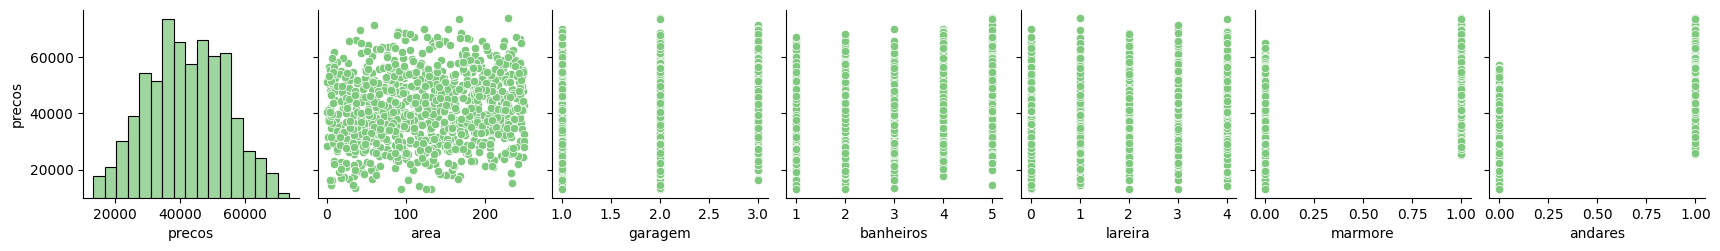

In [ ]:
ax = sns.pairplot(data = dados, y_vars = 'precos')

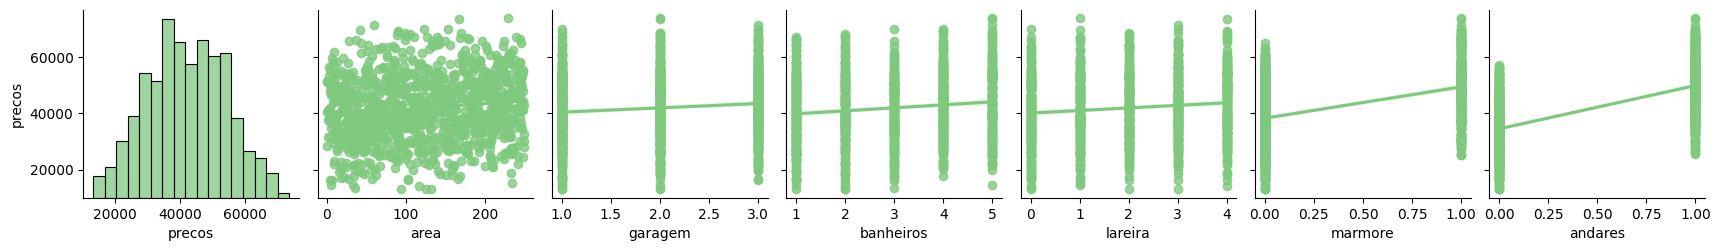

In [ ]:
ax = sns.pairplot(data = dados, y_vars = 'precos', kind = 'reg')

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear</font>
<hr style='border: 2px solid red;'>

## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar a variável dependente (y)

In [ ]:
y = dados['precos']
y.head(20)

0     51875
1     17875
2     47075
3     38575
4     33775
5     35450
6     52025
7     37550
8     31500
9     37650
10    57075
11    38750
12    29950
13    30750
14    45750
15    52875
16    41850
17    36150
18    60850
19    60225
Name: precos, dtype: int64

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [ ]:
x = dados[['area', 'marmore', 'andares']]
x_2 = dados[['marmore', 'andares']]
x_3 = dados[['area', 'garagem', 'banheiros', 'lareira', 'marmore', 'andares']]

## Criando os datasets de treino e de teste

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 111)
x_2_train, x_2_test, y_2_train, y_2_test = train_test_split(x_2, y, test_size = 0.3, random_state = 111)
x_3_train, x_3_test, y_3_train, y_3_test = train_test_split(x_3, y, test_size = 0.3, random_state = 111)

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando a classe *LinearRegression()*

In [ ]:
modelo = LinearRegression()
modelo_2 = LinearRegression()
modelo_3 = LinearRegression()

## Utilizando o método *fit()* para estimar o modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [ ]:
modelo.fit(X = x_train, y = y_train)
modelo_2.fit(X = x_2_train, y = y_2_train)
modelo_3.fit(X = x_3_train, y = y_3_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score


### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>O modelo apresenta um bom ajuste?</li>
    <li>Você lembra o que representa o R²?</li>
    <li>Qual medida podemos tomar para melhorar essa estatística?</li>
</ul>

In [ ]:
print("R² = {:.2f}".format(modelo.score(X = x_train, y = y_train)))
print("R² = {:.2f}".format(modelo_2.score(X = x_2_train, y = y_2_train)))
print("R² = {:.2f}".format(modelo_3.score(X = x_3_train, y = y_3_train)))

R² = 0.59
R² = 0.58
R² = 0.64


## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [ ]:
x_3_test

,area,garagem,banheiros,lareira,marmore,andares
190,4,3,1,3,1,1
104,61,2,1,1,0,0
295,25,2,3,1,0,0
12,58,1,1,0,1,0
87,122,2,4,3,1,1
...,...,...,...,...,...,...
354,152,2,2,4,0,1
831,169,3,5,2,1,1
638,167,2,2,4,0,0
158,197,3,4,3,0,0


In [ ]:
y_previsto = modelo.predict(X = x_test)
y_previsto_train = modelo.predict(X = x_train)
y_2_previsto = modelo_2.predict(X = x_2_test)
y_2_previsto_train = modelo_2.predict(X = x_2_train)
y_3_previsto = modelo_3.predict(X = x_3_test)
y_3_previsto_train = modelo_3.predict(X = x_3_train)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [ ]:
print("Treino")
print("R² = {:.2f}".format(metrics.r2_score(y_true = y_train, y_pred= y_previsto_train)))
print("Teste")
print("R² = {:.2f}".format(metrics.r2_score(y_true = y_test, y_pred= y_previsto)))
print("Treino 2")
print("R² = {:.2f}".format(metrics.r2_score(y_true = y_2_train, y_pred= y_2_previsto_train)))
print("Teste 2")
print("R² = {:.2f}".format(metrics.r2_score(y_true = y_2_test, y_pred= y_2_previsto)))
print("Treino 3")
print("R² = {:.2f}".format(metrics.r2_score(y_true = y_3_train, y_pred= y_3_previsto_train)))
print("Teste 3")
print("R² = {:.2f}".format(metrics.r2_score(y_true = y_3_test, y_pred= y_3_previsto)))

Treino
R² = 0.59
Teste
R² = 0.63
Treino 2
R² = 0.58
Teste 2
R² = 0.60
Treino 3
R² = 0.64
Teste 3
R² = 0.68


# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Criando um simulador simples

Crie um simulador que gere estimativas de preço a partir de um conjunto de informações de um imóvel.

In [ ]:
# Valor da área em m²
area = 200

# Possui mármore branco na decoração? [1 - SIM / 0 - NÃO]
marmore = 1

# Possui 2 ou mais andares? [1 - SIM / 0 - NÃO]
andares = 1

entrada = [area, marmore, andares]
previsao = modelo.predict([entrada])[0]

print("Baseado nos valores passados, o imóvel deve custar: R$ {:.2f}".format(previsao))

Baseado nos valores passados, o imóvel deve custar: R$ 59165.42


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# <font color='red' style='font-size: 30px;'>Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Métricas da regressão
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

## Obtendo métricas para o modelo


In [ ]:
pd.set_option("display.precision", 8)

In [ ]:
EABS = metrics.mean_absolute_error(y_true = y_test, y_pred = y_previsto).round(3)
EQM = metrics.mean_squared_error(y_true = y_test, y_pred = y_previsto).round(3)
REQM = np.sqrt(metrics.mean_squared_error(y_true = y_test, y_pred = y_previsto)).round(3)
R2 = metrics.r2_score(y_true = y_test, y_pred = y_previsto).round(3)

df_1 = pd.DataFrame([EABS, EQM, REQM, R2], index= ["Erro Absoluto", "Erro do Quadrado Médio", "Raiz da Média do Erro Quadrado", "Coeficiente de Correlação"], columns=["Métricas"])

EABS_2 = metrics.mean_absolute_error(y_true = y_2_test, y_pred = y_2_previsto).round(3)
EQM_2 = metrics.mean_squared_error(y_true = y_2_test, y_pred = y_2_previsto).round(3)
REQM_2 = np.sqrt(metrics.mean_squared_error(y_true = y_2_test, y_pred = y_2_previsto)).round(3)
R2_2 = metrics.r2_score(y_true = y_2_test, y_pred = y_2_previsto).round(3)

df_2 = pd.DataFrame([EABS_2, EQM_2, REQM_2, R2_2], index= ["Erro Absoluto", "Erro do Quadrado Médio", "Raiz da Média do Erro Quadrado", "Coeficiente de Correlação"], columns=["Métricas"])

EABS_3 = metrics.mean_absolute_error(y_true = y_3_test, y_pred = y_3_previsto).round(3)
EQM_3 = metrics.mean_squared_error(y_true = y_3_test, y_pred = y_3_previsto).round(3)
REQM_3 = np.sqrt(metrics.mean_squared_error(y_true = y_3_test, y_pred = y_3_previsto)).round(3)
R2_3 = metrics.r2_score(y_true = y_3_test, y_pred = y_3_previsto).round(3)

df_3 = pd.DataFrame([EABS_3, EQM_3, REQM_3, R2_3], index= ["Erro Absoluto", "Erro do Quadrado Médio", "Raiz da Média do Erro Quadrado", "Coeficiente de Correlação"], columns=["Métricas (all var.)"])

In [ ]:
df = pd.DataFrame.join(self = df_1, other = df_2, lsuffix = " (3 var.)", rsuffix = " (2 var.)", )
df = pd.DataFrame.join(self = df, other = df_3, lsuffix = "", rsuffix = " all var.")
df

,Métricas (3 var.),Métricas (2 var.),Métricas (all var.)
Erro Absoluto,6305.523,6480.355,5893.535
Erro do Quadrado Médio,54730268.365,58980155.981,48257783.847
Raiz da Média do Erro Quadrado,7397.991,7679.854,6946.782
Coeficiente de Correlação,0.632,0.604,0.676


# <font color='red' style='font-size: 30px;'>Salvando e Carregando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Importando a biblioteca pickle

In [ ]:
import pickle

## Salvando o modelo estimado

In [ ]:
output = open('modelo_preditor_imovel', 'wb')
pickle.dump(modelo_3, output)
output.close()

### Em um novo notebook/projeto Python

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

modelo = open('modelo_preço','rb')
lm_new = pickle.load(modelo)
modelo.close()

area = 38
garagem = 2
banheiros = 4
lareira = 4
marmore = 0
andares = 1

entrada = [[area, garagem, banheiros, lareira, marmore, andares]]

print('$ {0:.2f}'.format(lm_new.predict(entrada)[0]))
```

<h4 style='color: red; font-weight: normal'>Out [1]:</h4>

```
$ 46389.80
```